In [2]:
import numpy as np
import merg_rates
from progressbar import ProgressBar
from wetzel_utils.utility.utility_catalog import indices_tree

In [3]:
import matplotlib as mpl 
mpl.use('Agg')
import matplotlib.pyplot as plt 
from matplotlib import rcParams
%matplotlib inline

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [4]:
#tpm1=merg_rates.shamedTreepmClass(0.1,catkind='subhalo')
#tpm2=merg_rates.shamedTreepmClass(0.2,catkind='subhalo',source='li-march',shamziend=33)
tpm2=merg_rates.shamedTreepmClass(0.2,catkind='subhalo')
tpm2.mp_tree()
tpm2.merg_tree()

# in merg_rates.shamedTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_

running SHAM


100% |########################################################################|


building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 galaxies in snapshot 34
1657 merge with larger galaxies
2906961 galaxies in snapshot 33
7578 merge with larger galaxies
3267446 galaxies in snapshot 32
19635 merge with larger galaxies
3591830 galaxies in snapshot 31
31754 merge with larger galaxies
3901457 galaxies in snapshot 30
5945 merge with larger galaxies
4187628 galaxies in snapshot 29
1027 merge with larger galaxies
4451504 galaxies in snapshot 28
64462 merge with larger galaxies
4697199 galaxies in snapshot 27
1767 merge with larger galaxies
4914942 galaxies in snapshot 26
8659 merge with larger galaxies
5105362 galaxies in snapshot 25
57 merge with larger galaxies
5270374 galaxies in snapshot 24
1926 merge with larger galaxies
5409626 galaxies in snapshot 23
22109 merge with larger galaxies
5527314 galaxies in snapshot 22
467 merge with larger galaxies
5620673 galaxies in snapshot 21
87519 merge with larger galaxies
5697344 galaxies in snapshot 20
2041 merge with larger galaxies
5753867 galaxies

In [4]:
midbins_s_12,N_gmratio_s_12=np.loadtxt('dat/stewart12m_M0.csv',
                                       delimiter=',',
                                       unpack=True)
midbins_s_13,N_gmratio_s_13=np.loadtxt('dat/stewart13m_M0.csv',
                                       delimiter=',',
                                       unpack=True)

# Testing $\frac{dN}{dz}(z)$

/home/users/staudt/envs/mergerspython2env/lib/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


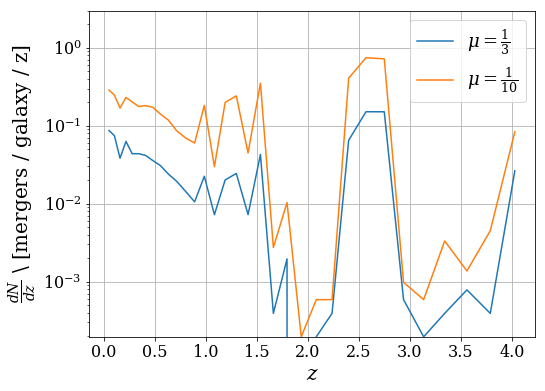

In [6]:
dNdxs_3=merg_rates.dNdx_ofz(tpm2,10.5,np.log10(1./3.),
                            'cengal',dx='dz',
                            ziend=33)
dNdxs_10=merg_rates.dNdx_ofz(tpm2,10.5,np.log10(1./10.),
                             'cengal',dx='dz',
                             ziend=33)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(dNdxs_3[0],dNdxs_3[1],
        label='$\mu=\\frac{1}{3}$')
ax.plot(dNdxs_10[0],dNdxs_10[1],
        label='$\mu=\\frac{1}{10}$')
ax.set_xlabel('$z$')
ax.set_ylabel('$\\frac{dN}{dz}$ \ [mergers / galaxy / z]')
ax.set_yscale('log')
ax.set_ylim(0,3)
ax.legend()
plt.show()

building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 halos in snapshot 34
1657 merge with larger halos
2906961 halos in snapshot 33
7578 merge with larger halos
3267446 halos in snapshot 32
19635 merge with larger halos
3591830 halos in snapshot 31
31754 merge with larger halos
3901457 halos in snapshot 30
43747 merge with larger halos
4187628 halos in snapshot 29
55190 merge with larger halos
4451504 halos in snapshot 28
64462 merge with larger halos
4697199 halos in snapshot 27
71716 merge with larger halos
4914942 halos in snapshot 26
77090 merge with larger halos
5105362 halos in snapshot 25
81869 merge with larger halos
5270374 halos in snapshot 24
83817 merge with larger halos
5409626 halos in snapshot 23
85356 merge with larger halos
5527314 halos in snapshot 22
86644 merge with larger halos
5620673 halos in snapshot 21
87519 merge with larger halos
5697344 halos in snapshot 20
87121 merge with larger halos
5753867 halos in snapshot 19
86837 merge with larger halos
5795900 halos in snapshot 18
85829 m

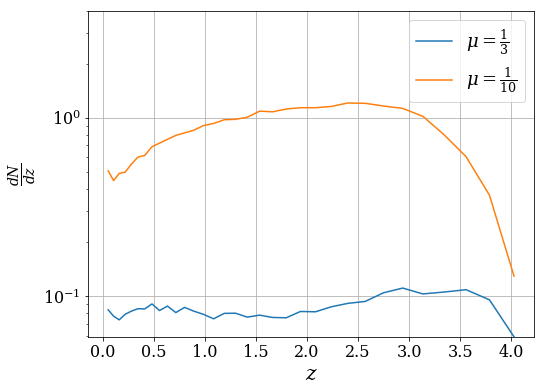

In [7]:
dNdxs_3=merg_rates.dNdx_ofz(tpm2,12.,np.log10(1./3.),
                            'censubhal',dx='dz',
                            ziend=33)
dNdxs_10=merg_rates.dNdx_ofz(tpm2,12.,np.log10(1./10.),
                             'censubhal',dx='dz',
                             ziend=33)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(dNdxs_3[0],dNdxs_3[1],
        label='$\mu=\\frac{1}{3}$')
ax.plot(dNdxs_10[0],dNdxs_10[1],
        label='$\mu=\\frac{1}{10}$')
ax.set_xlabel('$z$')
ax.set_ylabel('$\\frac{dN}{dz}$')
ax.set_yscale('log')
ax.set_ylim(0,4)
ax.legend()
plt.show()

  read /data1/arwetzel/lcdm250/snapshot.txt
  read  3914367 halo from halo_tree_00.dat
  read  3939586 halo from halo_tree_01.dat
  read  3964156 halo from halo_tree_02.dat
  read  3991148 halo from halo_tree_03.dat
  read  4017802 halo from halo_tree_04.dat
  read  4043082 halo from halo_tree_05.dat
  read  4068695 halo from halo_tree_06.dat
  read  4091273 halo from halo_tree_07.dat
  read  4114245 halo from halo_tree_08.dat
  read  4134906 halo from halo_tree_09.dat
  read  4156401 halo from halo_tree_10.dat
  read  4175240 halo from halo_tree_11.dat
  read  4191460 halo from halo_tree_12.dat
  read  4201253 halo from halo_tree_13.dat
  read  4207986 halo from halo_tree_14.dat
  read  4208029 halo from halo_tree_15.dat
  read  4202839 halo from halo_tree_16.dat
  read  4189843 halo from halo_tree_17.dat
  read  4168435 halo from halo_tree_18.dat
  read  4135114 halo from halo_tree_19.dat
  read  4092177 halo from halo_tree_20.dat
  read  4036281 halo from halo_tree_21.dat
  read  39

building main progenitor tree:


100% |########################################################################|


building merger tree:
1956524 halos in snapshot 34
112654 merge with larger halos
2193677 halos in snapshot 33
129517 merge with larger halos
2425708 halos in snapshot 32
145373 merge with larger halos
2648596 halos in snapshot 31
160448 merge with larger halos
2858599 halos in snapshot 30
176931 merge with larger halos
3053114 halos in snapshot 29
190531 merge with larger halos
3232419 halos in snapshot 28
205766 merge with larger halos
3398624 halos in snapshot 27
217199 merge with larger halos
3545863 halos in snapshot 26
228278 merge with larger halos
3677305 halos in snapshot 25
240581 merge with larger halos
3790788 halos in snapshot 24
250440 merge with larger halos
3886757 halos in snapshot 23
257801 merge with larger halos
3969364 halos in snapshot 22
263542 merge with larger halos
4036281 halos in snapshot 21
271384 merge with larger halos
4092177 halos in snapshot 20
276021 merge with larger halos
4135114 halos in snapshot 19
280332 merge with larger halos
4168435 halos in s

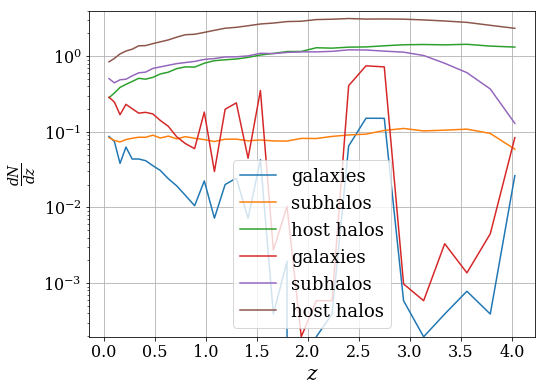

In [8]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

mu=np.log10(1./3.)
zs_gal,dNdzs_gal=merg_rates.dNdx_ofz(tpm2,10.5,mu,
                                     'cengal',dx='dz',ziend=33)
zs_sub,dNdzs_sub=merg_rates.dNdx_ofz(tpm2,12.,mu,
                                     'censubhal',dx='dz',ziend=33)
zs_host,dNdzs_host=merg_rates.dNdx_ofz(tpm2,12.,mu,'host',
                                       dx='dz',ziend=33)
ax.plot(zs_gal,dNdzs_gal,
        label='galaxies')
ax.plot(zs_sub,dNdzs_sub,
        label='subhalos')
ax.plot(zs_host,dNdzs_host,
        label='host halos')

mu=np.log10(1./10.)
zs_gal,dNdzs_gal=merg_rates.dNdx_ofz(tpm2,10.5,mu,
                                     'cengal',dx='dz',ziend=33)
zs_sub,dNdzs_sub=merg_rates.dNdx_ofz(tpm2,12.,mu,
                                     'censubhal',dx='dz',ziend=33)
zs_host,dNdzs_host=merg_rates.dNdx_ofz(tpm2,12.,mu,'host',
                                       dx='dz',ziend=33)
ax.plot(zs_gal,dNdzs_gal,
        label='galaxies')
ax.plot(zs_sub,dNdzs_sub,
        label='subhalos')
ax.plot(zs_host,dNdzs_host,
        label='host halos')

ax.set_xlabel('$z$')
ax.set_ylabel('$\\frac{dN}{dz}$')
ax.set_yscale('log')
ax.set_ylim(0,4)
ax.legend()
plt.show()

# $\frac{dN}{dz}(\mu)$

In [55]:
reload(merg_rates)

<module 'merg_rates' from 'merg_rates.py'>

In [161]:
print tpm2.subcat[1]['sub.merg.branch'][62225]
print tpm2.subcat[1][tpm2.smtype][59741]
print tpm2.subcat[1]['m.bound'][59741]
print tpm2.subcat[1]['halo.i'][59741]
print tpm2.subcat[1]['inf.last.zi'][59741]
print indices_tree(tpm2.hostcat,1,34,45176)
print tpm2.hostcat[34]['m.200c'][90817]

print''
for zi_ in np.arange(34,1,-1):
    hi_=indices_tree(tpm2.hostcat,1,zi_,45176)
    print tpm2.hostcat[zi_]['m.200c'][hi_]
print''
print tpm2.subcat[1]['m.bound'][59741]
print tpm2.subcat[1]['par.i'][59741]
print''
print tpm2.subcat[1]['ilk'][]

[59741]
11.786624
11.239812
45167
-1
90817
10.09453

10.09453
10.170389
10.285434
10.436501
10.522577
10.617297
10.789486
10.887044
10.965656
10.931411
11.031878
11.017673
11.006117
11.054947
11.117305
11.231764
11.228919
11.203747
11.233283
11.307508
11.36872
11.41777
11.514148
11.639131
11.608769
11.51892
11.478864
11.476217
11.510745
11.569896
11.609447
11.601433
11.624015

11.239812
-1


In [177]:
test=np.array([1])
mask=[False]
print type(mask)
mask2=test>1
print type(mask2)
print mask2
test=list(test)
print test[mask2]

<type 'list'>
<type 'numpy.ndarray'>
[False]


TypeError: only integer scalar arrays can be converted to a scalar index

In [42]:
print tpm2.subcat[1]['sub.merg.branch'][106064]
print tpm2.subcat[1]['inf.last.zi'][5202824]

print'\nHost index of the main progenitor at z=0:'
print tpm2.subcat[0]['halo.i'][106064]
print indices_tree(tpm2.hostcat,0,2,76459)

print'\nsubhalo index at infall given by indices_tree:'
print indices_tree(tpm2.subcat,1,2,5202824)
print'\nhost index at infall:'
print tpm2.subcat[2]['halo.i'][121339]
print'\nchild of that host:'
print tpm2.hostcat[2]['chi.i'][76721]
print'\nhost index of the minor progenitor at merger:'
print tpm2.subcat[1]['halo.i'][5202824]
print'\ncentral of the minor progenitor at merger:'
print tpm2.subcat[1]['cen.i'][5202824]
print''
print tpm2.subcat[2]['ilk'][121339]
print'\nchild of subhalo at infall:'
print tpm2.subcat[2]['chi.i'][121339]
print'\nhost of that child:'
print tpm2.subcat[1]['halo.i'][5202824]
print"\nchild':"
print tpm2.subcat[1]['chi.i'][5202824]
print'This matches the main progenitor hi0 index.'

[5202824]
2

Host index of the main progenitor at z=0:
76459
-3964157

subhalo index at infall given by indices_tree:
121339

host index at infall:
76721

child of that host:
-1

host index of the minor progenitor at merger:
-1

central of the minor progenitor at merger:
-1

0

child of subhalo at infall:
5202824

host of that child:
-1

child':
106064
This matches the main progenitor hi0 index.


In [70]:
ziend=1
force=True
thru=False
typ='censubhal'

mus_12,dNdzs_12=merg_rates.dNdx_ofmu(tpm2,12.,typ,'z',
                                     forcem200=force,through=thru,ziend=ziend)
mus_11,dNdzs_11=merg_rates.dNdx_ofmu(tpm2,11.,typ,'z',
                                     forcem200=force,through=thru,ziend=ziend)
mus_13,dNdzs_13=merg_rates.dNdx_ofmu(tpm2,13.,typ,'z',
                                     forcem200=force,through=thru,ziend=ziend)


running N(>mu)

running N(>mu)

running N(>mu)


In [58]:
anguloms,anguloN=np.loadtxt('dat/true_angulo.csv',delimiter=',',
                            unpack=True)
wetzelloms,wetzelloN=np.loadtxt('dat/true_wetzello.csv',delimiter=',',
                                unpack=True)
wetzelhims,wetzelhiN=np.loadtxt('dat/true_wetzelhi.csv',delimiter=',',
                                unpack=True)

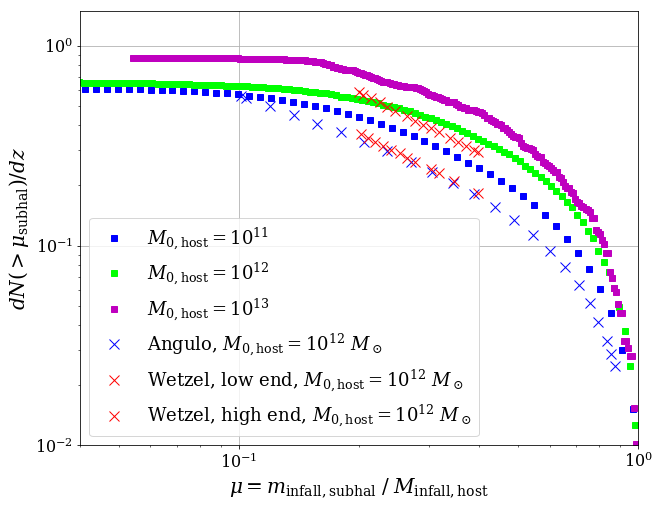

In [103]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
gcol=(0.,255./255.,0./255.)

ax.plot(10.**mus_11,dNdzs_11,'s',mec='blue',mfc='blue',
        label='$M_{0,\mathrm{host}}=10^{11}$')
ax.plot(10.**mus_12,dNdzs_12,'s',mec=gcol,mfc=gcol,
        label='$M_{0,\mathrm{host}}=10^{12}$')
ax.plot(10.**mus_13,dNdzs_13,'s',mec='m',mfc='m',
        label='$M_{0,\mathrm{host}}=10^{13}$')

ms=10
ax.loglog(anguloms,anguloN,'x',mec='b',mfc='None',
          label='Angulo, $M_{0,\mathrm{host}}=10^{12}\ M_\odot$',ms=ms)
ax.loglog(wetzelloms,wetzelloN,'x',mec='r',mfc='None',
          label='Wetzel, low end, $M_{0,\mathrm{host}}=10^{12}\ M_\odot$',ms=ms)
ax.loglog(wetzelhims,wetzelhiN,'x',mec='r',mfc='None',
          label='Wetzel, high end, $M_{0,\mathrm{host}}=10^{12}\ M_\odot$',ms=ms)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(4e-2,1)
ax.set_ylim(1e-2,1.5)
#ax.set_ylim(2e-3,1.5)
ax.set_ylabel('$dN(>\mu_\mathrm{subhal})/dz$')
ax.set_xlabel('$\mu=m_{\mathrm{infall,subhal}}\;/\;M_{\mathrm{infall,host}}$')
ax.legend()
plt.show()

# Testing new $N(>\mu)$ code

In [12]:
'''
def N_mu_ft(self,ax,M0,typ,Mtype='z',ziend=34,through=False,
            ymin=2e-1,ymax=2e1,label=None):    
    
    #Plots the cumulative number of mergers per                             
    #halo/galaxy, N(>mu), where mu is m/M.                                  
    #"ft" stands for "function using tree"                                  
    if not typ in ['gal','cengal','host','subhal','censubhal']:             
        raise ValueError('typ must be "gal", "cengal", "subhal", '          
                         '"censubhal", or "host"')                          
    if typ in ['gal','cengal']:                                             
        mtype=self.gmtype                                                   
        #set the merger-branch and main-progenitor-branch strings           
        m_brstr='gal.merg.branch'                                           
        mp_brstr='gal.mp.branch'                                            
        self.readsub()                                                      
        cat=self.subcat                                                     
        if not self.mptree_gal_blt:                                         
            self.mp_tree(typ=typ)                               
        if not self.mtree_gal_blt:                                          
            self.merg_tree(typ=typ)                             
    elif typ in ['subhal','censubhal']:                                     
        mtype=self.smtype                                                   
        #set the merger-branch and main-progenitor-branch strings           
        m_brstr='sub.merg.branch'                                           
        mp_brstr='sub.mp.branch'                                            
        self.readsub()                                                      
        cat=self.subcat                                                     
        if not self.mptree_sub_blt:                                         
            self.mp_tree(typ=typ)                               
        if not self.mtree_sub_blt:                                          
            self.merg_tree(typ=typ)                             
    elif typ=='host':                                                       
        mtype=self.hmtype                                                   
        #set the merger-branch and main-progenitor-branch strings           
        m_brstr='merg.branch'                                               
        mp_brstr='mp.branch'                                                
        self.readhost()                             
        cat=self.hostcat                                                    
        if not self.mptree_host_blt:                                        
            self.mp_tree(typ=typ)                               
        if not self.mtree_host_blt:                                         
            self.merg_tree(typ=typ)                             
    allM0s=cat[0][mtype]                                                    
    inrange=(allM0s<M0+self.Mwid/2.) & (allM0s>M0-self.Mwid/2.)             
    hi0s=np.arange(len(allM0s))[inrange]                                    
    if typ in ['cengal','censubhal']:                                       
        iscen=cat[0]['ilk'][hi0s]==1                                        
        hi0s=hi0s[iscen]                                                    

    if through:                                                             
        #take only main progenitors that exist at ziend                        
        hiends=indices_tree(cat,0,ziend,hi0s)                               
        goesthrough=hiends>=0                                               
        hi0s=hi0s[goesthrough]                                              
        hiends=hiends[goesthrough]                                          
        #take only main progenitors whose mass is not nan at                
        #ziend                                                              
        msend=cat[ziend][mtype][hiends]                                     
        notnan=~np.isnan(msend)                                             
        hi0s=hi0s[notnan]                                                   
        hiends=hiends[notnan]                                               
        msend=msend[notnan]                                                 
        #take only main progenitors that have non-zero mass at              
        #ziend                                                              
        pos_msend=msend>0.                                                  
        hi0s=hi0s[pos_msend]                                                

    allzis=np.arange(ziend+1)                                               
    mzMs=[]                                                                 

    print'\nrunning N(>mu):'                                                
    for hi0 in hi0s:                                                        
        M0=cat[0][mtype][hi0]                                               
        if Mtype=='0':                                                      
            M=M0                                                            
        for zi in allzis[1:]:                                               
            mergbranch=cat[zi][m_brstr]                                     
            mpbranch=cat[zi-1][mp_brstr]                                    
            if hi0 in mpbranch:                                             
                chii=mpbranch[hi0]                                          
                if chii in mergbranch:                                      
                    merg_is=mergbranch[chii]                                
                else:                                                       
                    continue                                                
            else:                                                           
                continue                                                    
            ms=cat[zi][mtype][merg_is]                                      
            if Mtype=='z':                                                  
                primi=cat[zi][mp_brstr][hi0]                                
                M=cat[zi][mtype][primi]                                     
            mzMs_add=list(ms-M)                                             
            mzMs+=mzMs_add                                                  
    mzMs=-np.abs(mzMs)             
    
    ax.hist(mzMs,bins=50,cumulative=-1,histtype='step',lw=2,                
            weights=np.repeat(1./len(hi0s),len(mzMs)),
            label=label)             
'''
end=1

In [77]:
midbins_s_12,N_gmratio_s_12=np.loadtxt('dat/stewart12m_M0.csv',         
                                       delimiter=',',                   
                                       unpack=True)                     
midbins_s_13,N_gmratio_s_13=np.loadtxt('dat/stewart13m_M0.csv',         
                                       delimiter=',',                   
                                       unpack=True)                      

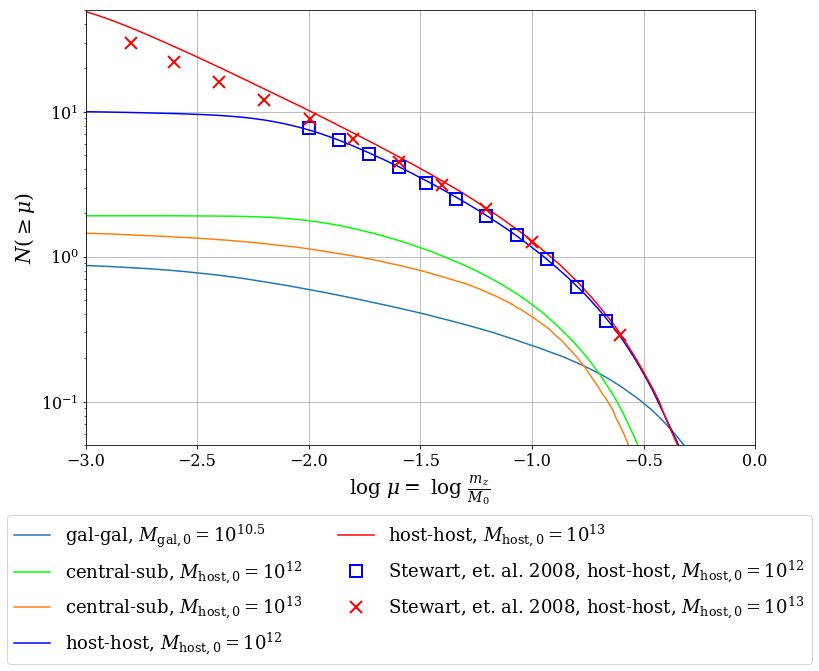

In [105]:
fig=plt.figure(figsize=(12,8))                                           
ax=fig.add_subplot(111)                                                 

'''
musgal,Nsgal=merg_rates.N_mu_ft(tpm2,10.5,'cengal',ziend=33,Mtime='0',
                                forcem200=False)
mussub12,Nssub12=merg_rates.N_mu_ft(tpm2,12.,'censubhal',ziend=33,
                                    Mtime='0',
                                    forcem200=True)
mussub13,Nssub13=merg_rates.N_mu_ft(tpm2,13.,'censubhal',ziend=33,
                                    Mtime='0',
                                    forcem200=True)
mushost12,Nshost12=merg_rates.N_mu_ft(tpm2,12.,'host',ziend=33,Mtime='0')
mushost13,Nshost13=merg_rates.N_mu_ft(tpm2,13.,'host',ziend=33,Mtime='0')
'''

gcol=(0.,255./255.,0./255.)
ax.plot(musgal,Nsgal,label='gal-gal, $M_\mathrm{gal,0}=10^{10.5}$')
ax.plot(mussub12,Nssub12,
        label='central-sub, $M_\mathrm{host,0}=10^{12}$',
        color=gcol)
ax.plot(mussub13,Nssub13,
        label='central-sub, $M_\mathrm{host,0}=10^{13}$')
ax.plot(mushost12,Nshost12,
        label='host-host, $M_\mathrm{host,0}=10^{12}$',
        color='b')
ax.plot(mushost13,Nshost13,
        label='host-host, $M_\mathrm{host,0}=10^{13}$',
        color='r')
ax.plot(np.log10(midbins_s_12),N_gmratio_s_12,'s',mec='b',              
        mfc='None',                                                     
        ms=12,mew=2,label='Stewart, et. al. 2008, host-host, '
                          '$M_\mathrm{host,0}=10^{12}$')                                                 
ax.plot(np.log10(midbins_s_13),N_gmratio_s_13,'x',mec='r',              
        mfc='None',                                                     
        ms=12,mew=2,label='Stewart, et. al. 2008, host-host, '
                          '$M_\mathrm{host,0}=10^{13}$')                                                 


ax.set_xlim(-3,0)                                                       
ax.set_ylim(5e-2,5e1)                                                   
ax.set_yscale('log')       
ax.set_xlabel('log $\mu=$ log $\\frac{m_z}{M_0}$')
#ax.set_title('Number of mergers where $\\frac{m_z}{M_0}\geq\mu$')
ax.set_ylabel('$N(\geq\mu)$')
ax.legend(bbox_to_anchor=(0.5,-.27),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2)
plt.show()


running N(>mu)

running N(>mu)

running N(>mu)


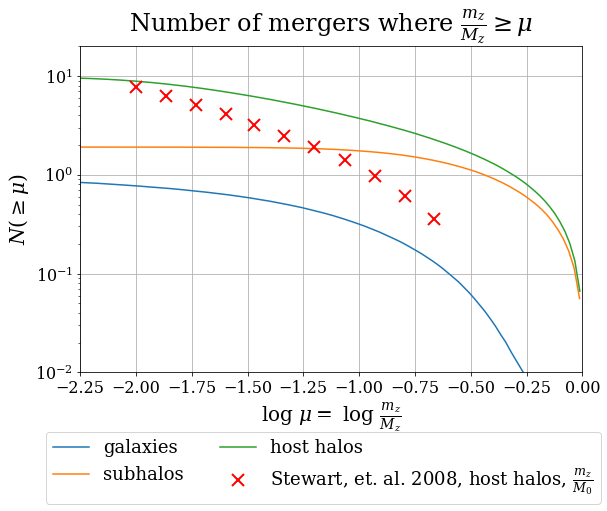

In [106]:
fig=plt.figure(figsize=(9,6))                                           
ax=fig.add_subplot(111)                                                 

musgal,Nsgal=merg_rates.N_mu_ft(tpm2,10.5,'cengal',ziend=33,Mtime='z')
mussub,Nssub=merg_rates.N_mu_ft(tpm2,12.,'censubhal',ziend=33,
                                Mtime='z',forcem200=True)
mushost,Nshost=merg_rates.N_mu_ft(tpm2,12.,'host',ziend=33,Mtime='z')

ax.plot(musgal,Nsgal,label='galaxies')
ax.plot(mussub,Nssub,label='subhalos')
ax.plot(mushost,Nshost,label='host halos')

ax.plot(np.log10(midbins_s_12),N_gmratio_s_12,'x',mec='r',              
        mfc='None',                                                     
        ms=12,mew=2,label='Stewart, et. al. 2008, host halos, '\
                          '$\\frac{m_z}{M_0}$')                                                 

ax.set_xlim(-2.25,0)                                                       
ax.set_ylim(1e-2,2e1)                                                   
ax.set_yscale('log')       
ax.set_xlabel('log $\mu=$ log $\\frac{m_z}{M_z}$')
ax.set_title('Number of mergers where $\\frac{m_z}{M_z}\geq\mu$')
ax.set_ylabel('$N(\geq\mu)$')
ax.legend(bbox_to_anchor=(0.5,-.2),
          bbox_transform=fig.transFigure,
          loc="lower center",ncol=2)
plt.show()


running N(>mu)


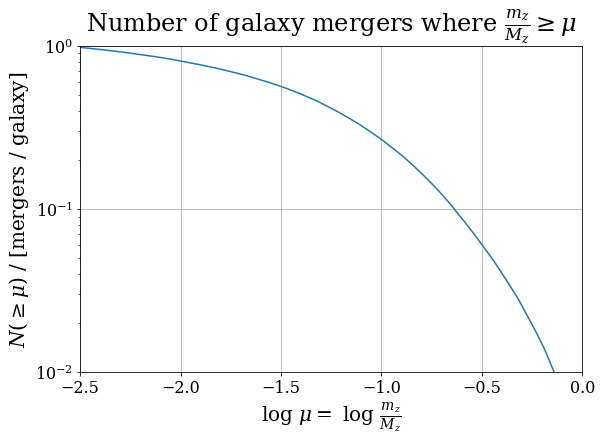

<Figure size 432x288 with 0 Axes>

In [16]:
fig=plt.figure(figsize=(9,6))                                           
ax=fig.add_subplot(111)                                                 

musgal,Nsgal=merg_rates.N_mu_ft(tpm2,10.5,'cengal',ziend=33,
                                Mtime='z')                                 
ax.plot(musgal,Nsgal)
ax.set_xlim(-2.5,0)                                                       
ax.set_ylim(1e-2,1)                                                   
ax.set_yscale('log')       
ax.set_xlabel('log $\mu=$ log $\\frac{m_z}{M_z}$')
ax.set_title('Number of galaxy mergers where $\\frac{m_z}{M_z}\geq\mu$')
ax.set_ylabel('$N(\geq\mu)$ / [mergers / galaxy]')
#ax.legend(bbox_to_anchor=(0.5,-.2),
#          bbox_transform=fig.transFigure,
#          loc="lower center",ncol=2)
plt.show()  

# Testing

In [52]:
a=[1,2]
b=np.array(a)
mask=b>1
print mask
a[mask]

[False  True]


TypeError: only integer scalar arrays can be converted to a scalar index